In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve

# System
import warnings

# Settings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
data_path = '/content/drive/MyDrive/DATASET/nsl-kdd/'

In [4]:
data_train = pd.read_csv(data_path + "KDDTrain+.txt", header=None)

In [5]:
print(data_train.shape)
data_train.head()

(125973, 43)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
# Danh sách 43 tên cột cho tập dữ liệu
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

data_train.columns = columns

In [7]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [8]:
data_train['outcome'].value_counts()

,count
outcome,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [9]:
# Nhóm thành 5 loại: normal, DoS, Probe, U2R, R2L
# Bài toán đơn giản hơn
attack_category = {
    'normal': 'normal',

    # DoS (Denial of Service)
    'back': 'DoS', 'land': 'DoS', 'neptune': 'DoS', 'pod': 'DoS', 'smurf': 'DoS', 'teardrop': 'DoS',
    'apache2': 'DoS', 'udpstorm': 'DoS', 'processtable': 'DoS',

    # Probe (Surveillance/Scanning)
    'satan': 'Probe', 'ipsweep': 'Probe', 'nmap': 'Probe', 'portsweep': 'Probe', 'mscan': 'Probe', 'saint': 'Probe',

    # U2R (User to Root)
    'buffer_overflow': 'U2R', 'loadmodule': 'U2R', 'perl': 'U2R', 'rootkit': 'U2R', 'xterm': 'U2R', 'ps': 'U2R',
    'sqlattack': 'U2R',

    # R2L (Remote to Local)
    'guess_passwd': 'R2L', 'ftp_write': 'R2L', 'imap': 'R2L', 'phf': 'R2L', 'multihop': 'R2L', 'warezmaster': 'R2L',
    'warezclient': 'R2L', 'spy': 'R2L', 'xlock': 'R2L', 'xsnoop': 'R2L', 'sendmail': 'R2L', 'named': 'R2L',
    'snmpgetattack': 'R2L', 'snmpguess': 'R2L', 'httptunnel': 'R2L', 'worm': 'R2L'
}

data_train['attack_type'] = data_train['outcome'].map(attack_category)

In [10]:
data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,DoS
125969,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,DoS


In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [12]:
# Thống kê mô tả cho các cột số (numeric)
data_train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.144650,45566.743000,19779.114421,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.515310,5870331.181891,4021269.151440,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.000000,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [13]:
# normal giữ nguyên, còn lại là attack
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
data_train.loc[data_train['outcome'] != "normal", "outcome"] = 'attack'

outcome
normal    67343
attack    58630
Name: count, dtype: int64


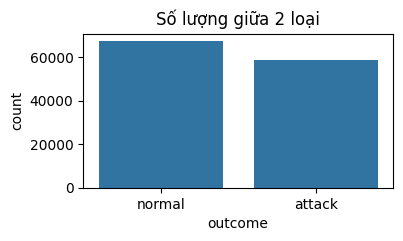

In [14]:
outcome_counts = data_train['outcome'].value_counts()
print(outcome_counts)

plt.figure(figsize=(4, 2))
sns.countplot(x=data_train['outcome'])
plt.title("Số lượng giữa 2 loại")
plt.show()

In [15]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)

    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

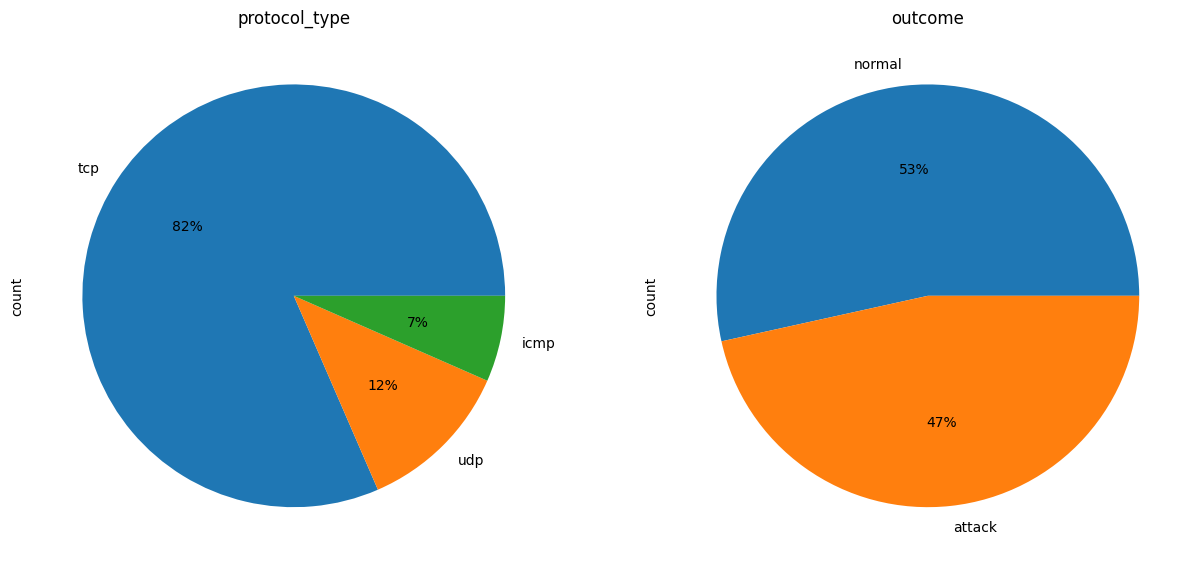

In [16]:
pie_plot(data_train, ['protocol_type', 'outcome'], 1, 2)

In [17]:
# Các cột số
def Scaling(df_num, cols):
    std_scaler_temp = RobustScaler().fit_transform(df_num)
    # Tạo DataFrame mới từ dữ liệu đã chuẩn hóa
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [18]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    dataframe = dataframe.drop(['attack_type'], axis=1, errors='ignore')

    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols) # scale các cột số
    dataframe.drop(labels=num_cols, axis="columns", inplace=True) # bỏ các cột số chưa scale khỏi df
    dataframe[num_cols] = scaled_df[num_cols] # gán các cột đax scale rồi vào lại df

    # Xử lý thiếu và trùng
    dataframe.dropna(inplace=True)
    dataframe.drop_duplicates(inplace=True)

    # one-hot encoding cho 3 cột phân loại
    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

In [19]:
y = data_train['attack_type'].copy()
scaled_train = preprocess(data_train)
print(scaled_train.shape)
scaled_train

(125964, 124)


,land,logged_in,is_host_login,is_guest_login,outcome,level,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,normal,20,0.0,1.619565,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.085106,-0.3750,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,-0.606936,-0.155102,-0.357895,0.142857,2.833333,0.0,0.00,0.00,0.05,0.00,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,normal,15,0.0,0.369565,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.007092,-0.4375,0.0,0.0,0.0,0.0,-1.010989,2.500000,0.00,0.000000,-0.253061,-0.536842,8.285714,14.666667,0.0,0.00,0.00,0.00,0.00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,attack,19,0.0,-0.159420,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.773050,-0.1250,1.0,1.0,0.0,0.0,-1.043956,1.166667,0.00,0.000000,-0.151020,-0.431579,0.428571,0.000000,0.0,1.00,1.00,0.00,0.00,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,0,1,0,0,normal,21,0.0,0.681159,15.800388,0.0,0.0,0.0,0.0,0.0,

In [20]:
x = scaled_train.drop(['outcome', 'level'] , axis = 1).values
y = y.loc[scaled_train.index].values

# Giảm chiều với PCA
pca = PCA(n_components=20)    # giữ lại 20 thành phần chính
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Số lượng features gốc là {} và sau khi giảm chiều còn {}".format(x.shape[1], x_reduced.shape[1]))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)

Số lượng features gốc là 122 và sau khi giảm chiều còn 20


In [21]:
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_confusion_matrix = confusion_matrix(y_train, train_pred)
    test_confusion_matrix = confusion_matrix(y_test, test_pred)

    train_accuracy = accuracy_score(y_train, train_pred)
    train_precision = precision_score(y_train, train_pred, average='macro', zero_division=0)
    train_recall = recall_score(y_train, train_pred, average='macro', zero_division=0)
    train_f1 = f1_score(y_train, train_pred, average='macro', zero_division=0)

    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred, average='macro', zero_division=0)
    test_recall = recall_score(y_test, test_pred, average='macro', zero_division=0)
    test_f1 = f1_score(y_test, test_pred, average='macro', zero_division=0)

    # Initialize AUC scores
    train_auc = test_auc = None

    # Check if model supports probability prediction
    supports_proba = hasattr(model, "predict_proba")
    if supports_proba:
        train_probs = model.predict_proba(X_train)
        test_probs = model.predict_proba(X_test)

        # Xác định số class
        n_classes = train_probs.shape[1]

        if n_classes == 2:
            # Binary classification
            train_auc = roc_auc_score(y_train, train_probs[:, 1])
            test_auc = roc_auc_score(y_test, test_probs[:, 1])
        else:
            # Multi-class classification
            train_auc = roc_auc_score(y_train, train_probs, multi_class='ovr')
            test_auc = roc_auc_score(y_test, test_probs, multi_class='ovr')


    print(f"Training Metrics for {name}:")
    print(f"Accuracy: {train_accuracy*100:.2f}%, Precision: {train_precision*100:.2f}%, Recall: {train_recall*100:.2f}%, F1 Score: {train_f1*100:.2f}%" +
          (f", AUC: {train_auc*100:.2f}%" if train_auc is not None else ""))
    print(f"Testing Metrics for {name}:")
    print(f"Accuracy: {test_accuracy*100:.2f}%, Precision: {test_precision*100:.2f}%, Recall: {test_recall*100:.2f}%, F1 Score: {test_f1*100:.2f}%" +
          (f", AUC: {test_auc*100:.2f}%" if test_auc is not None else ""))

    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    sns.heatmap(train_confusion_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Training Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.subplot(2, 1, 2)
    sns.heatmap(test_confusion_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Testing Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.tight_layout()
    plt.show()

    return test_accuracy, test_precision, test_recall, test_f1, test_auc

Training Metrics for Logistic Regression:
Accuracy: 87.54%, Precision: 56.10%, Recall: 57.10%, F1 Score: 56.39%, AUC: 93.39%
Testing Metrics for Logistic Regression:
Accuracy: 87.29%, Precision: 57.25%, Recall: 57.55%, F1 Score: 57.18%, AUC: 93.92%


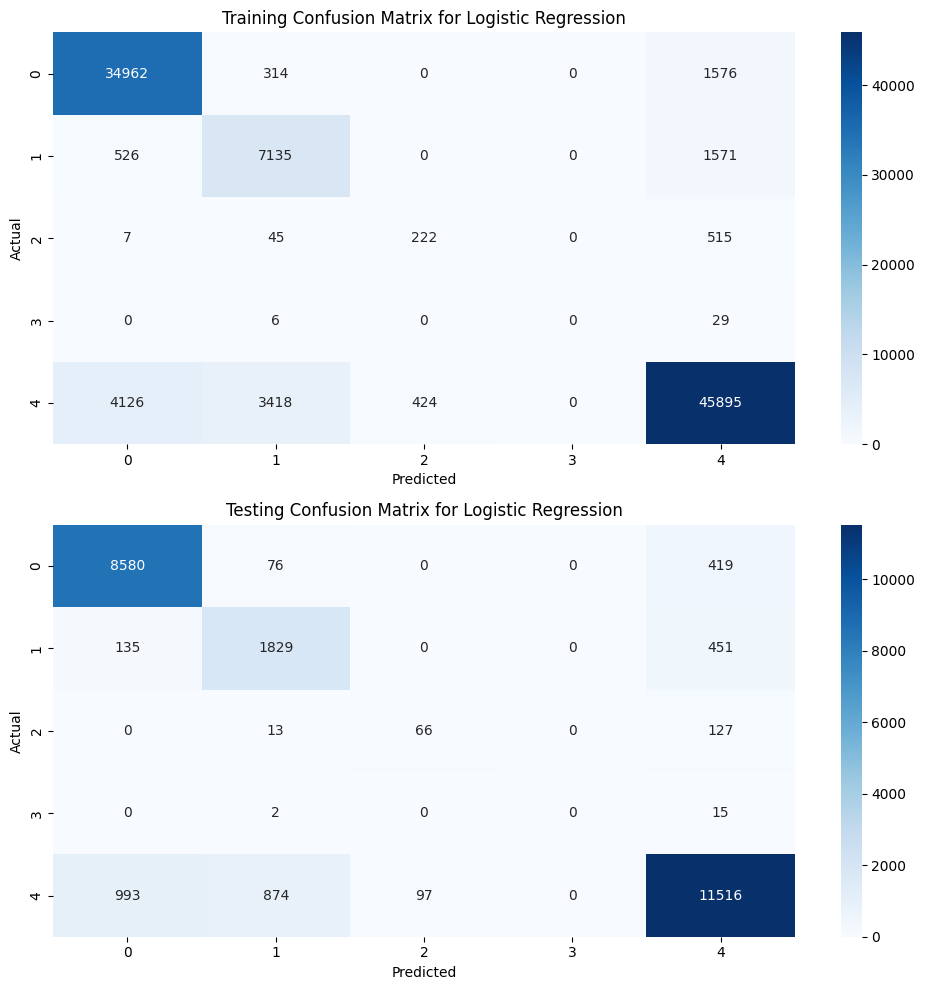

In [22]:
# Huấn luyện Logistic
lr = LogisticRegression(multi_class='ovr', max_iter=100).fit(x_train_reduced, y_train_reduced)
lr_test_accuracy, lr_test_precision, lr_test_recall, lr_test_f1, lr_test_auc = evaluate_classification(lr, "Logistic Regression", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

In [23]:
joblib.dump(lr, '/content/drive/MyDrive/logistic_regression_model.pkl')

['/content/drive/MyDrive/logistic_regression_model.pkl']

Training Metrics for GaussianNB:
Accuracy: 41.82%, Precision: 42.77%, Recall: 48.43%, F1 Score: 26.13%, AUC: 92.71%
Testing Metrics for GaussianNB:
Accuracy: 41.38%, Precision: 43.25%, Recall: 50.64%, F1 Score: 27.21%, AUC: 92.08%


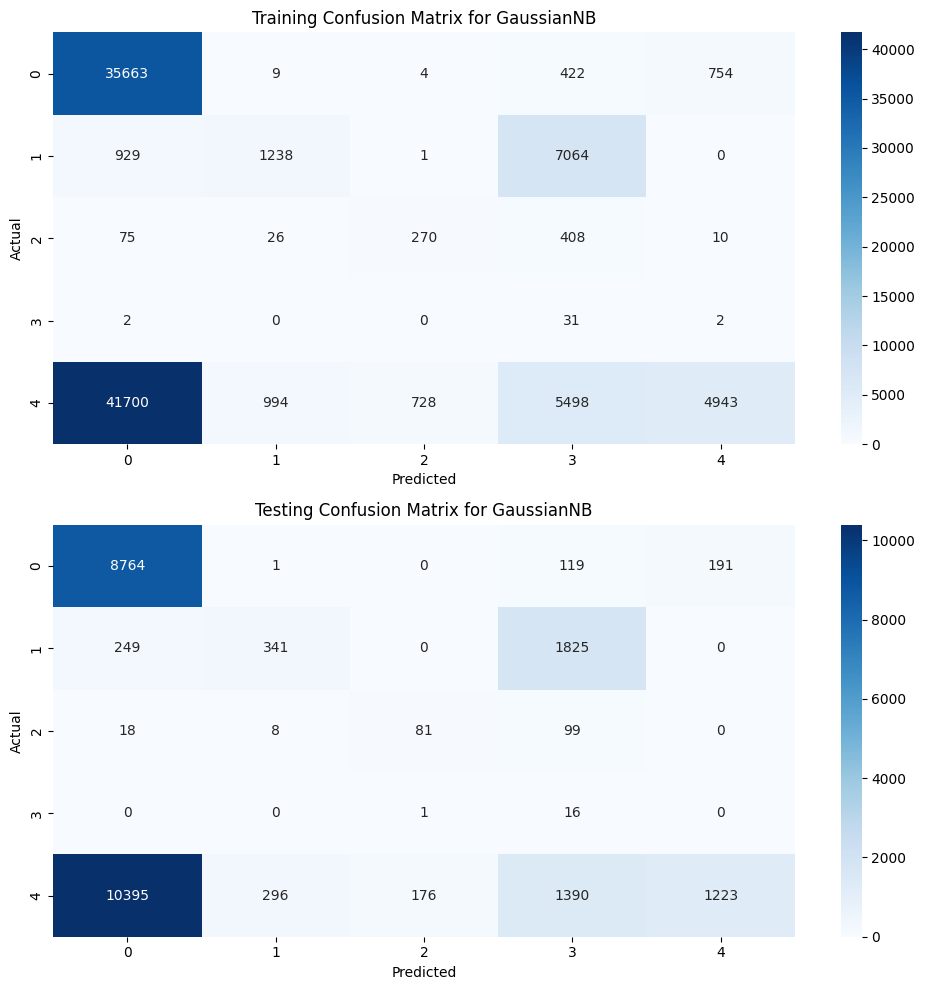

In [24]:
# Huấn luyện Gaussian Naive Bayes
gnb = GaussianNB().fit(x_train_reduced, y_train_reduced)
gnb_test_accuracy, gnb_test_precision, gnb_test_recall, gnb_test_f1, gnb_test_auc = evaluate_classification(gnb, "GaussianNB", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

In [25]:
joblib.dump(gnb, '/content/drive/MyDrive/naive_bayes_model.pkl')

['/content/drive/MyDrive/naive_bayes_model.pkl']

Training Metrics for Linear SVC(LBasedImpl):
Accuracy: 94.17%, Precision: 64.64%, Recall: 60.15%, F1 Score: 61.82%
Testing Metrics for Linear SVC(LBasedImpl):
Accuracy: 94.00%, Precision: 66.45%, Recall: 60.88%, F1 Score: 62.82%


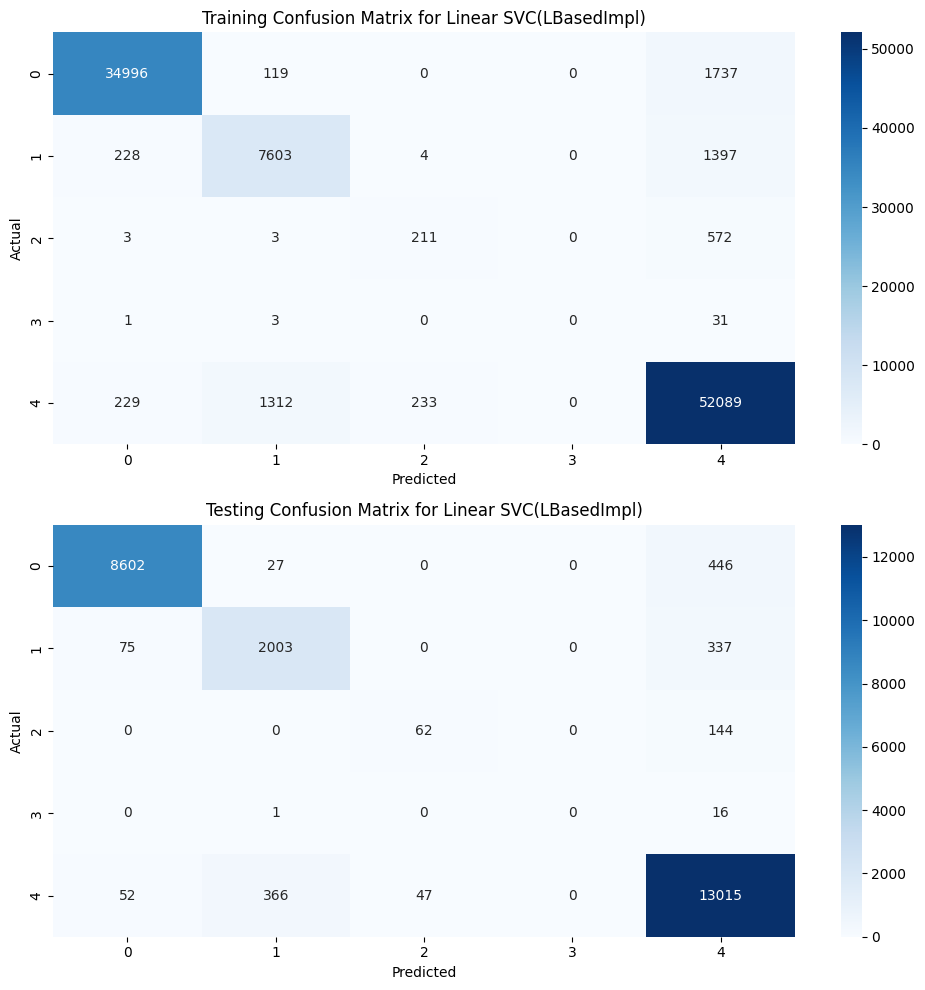

In [26]:
# Huấn luyện SVM
lin_svc = svm.LinearSVC(multi_class='ovr', max_iter=100).fit(x_train_reduced, y_train_reduced)
lin_svc_test_accuracy, lin_svc_test_precision, lin_svc_test_recall, lin_svc_test_f1, lin_svc_test_auc = evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

In [27]:
joblib.dump(lin_svc, '/content/drive/MyDrive/svm_model.pkl')

['/content/drive/MyDrive/svm_model.pkl']

Training Metrics for DecisionTreeClassifier:
Accuracy: 100.00%, Precision: 100.00%, Recall: 100.00%, F1 Score: 100.00%, AUC: 100.00%
Testing Metrics for DecisionTreeClassifier:
Accuracy: 99.62%, Precision: 91.62%, Recall: 90.33%, F1 Score: 90.93%, AUC: 95.11%


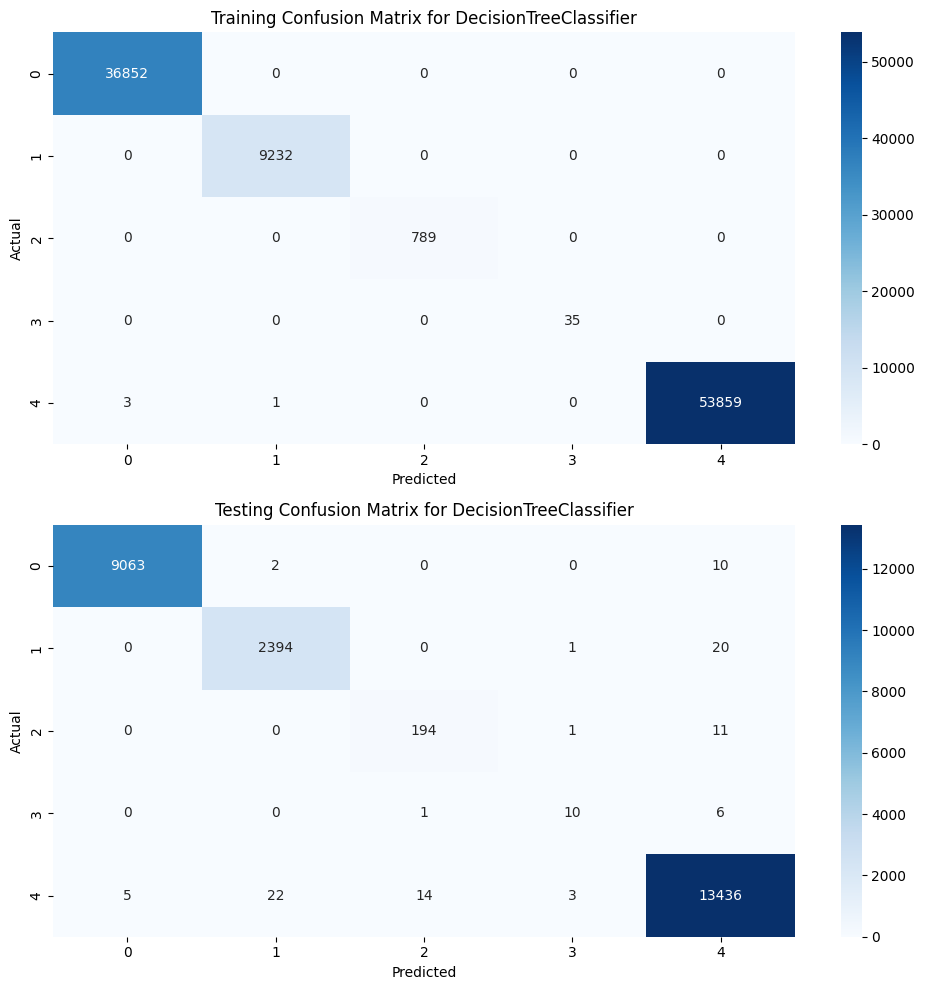

In [28]:
# Huấn luyện Decision Tree
tdt = DecisionTreeClassifier().fit(x_train_reduced, y_train_reduced)
tdt_test_accuracy, tdt_test_precision, tdt_test_recall, tdt_test_f1, tdt_test_auc = evaluate_classification(tdt, "DecisionTreeClassifier", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

In [29]:
joblib.dump(tdt, '/content/drive/MyDrive/decision_tree_model.pkl')

['/content/drive/MyDrive/decision_tree_model.pkl']

In [30]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names)))) # Sắp xếp theo importance tăng dần

    if top == -1: # Nếu không chỉ định số lượng top đặc trưng, lấy hết
        top = len(names)

    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

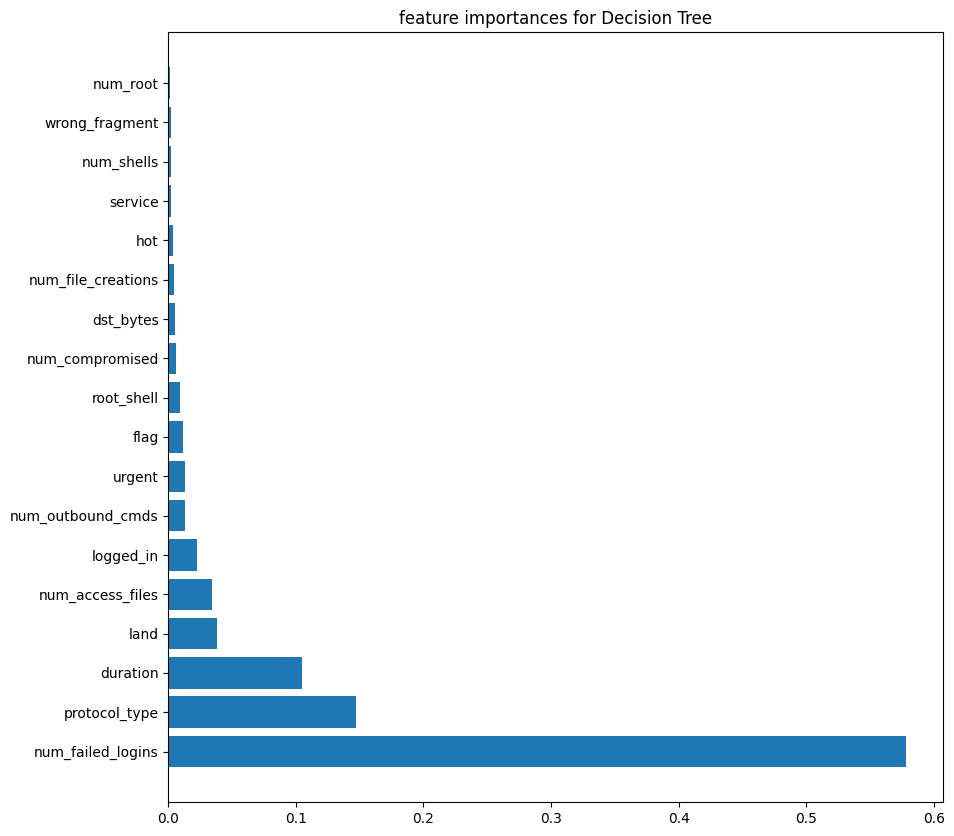

In [31]:
# Trực quan hóa độ quan trọng đặc trưng của mô hình Decision Tree
features_names = data_train.drop(['outcome', 'level'] , axis = 1)
f_importances(abs(tdt.feature_importances_), features_names, top=18)

Training Metrics for RandomForestClassifier:
Accuracy: 100.00%, Precision: 100.00%, Recall: 100.00%, F1 Score: 100.00%, AUC: 100.00%
Testing Metrics for RandomForestClassifier:
Accuracy: 99.81%, Precision: 96.24%, Recall: 90.92%, F1 Score: 93.16%, AUC: 99.95%


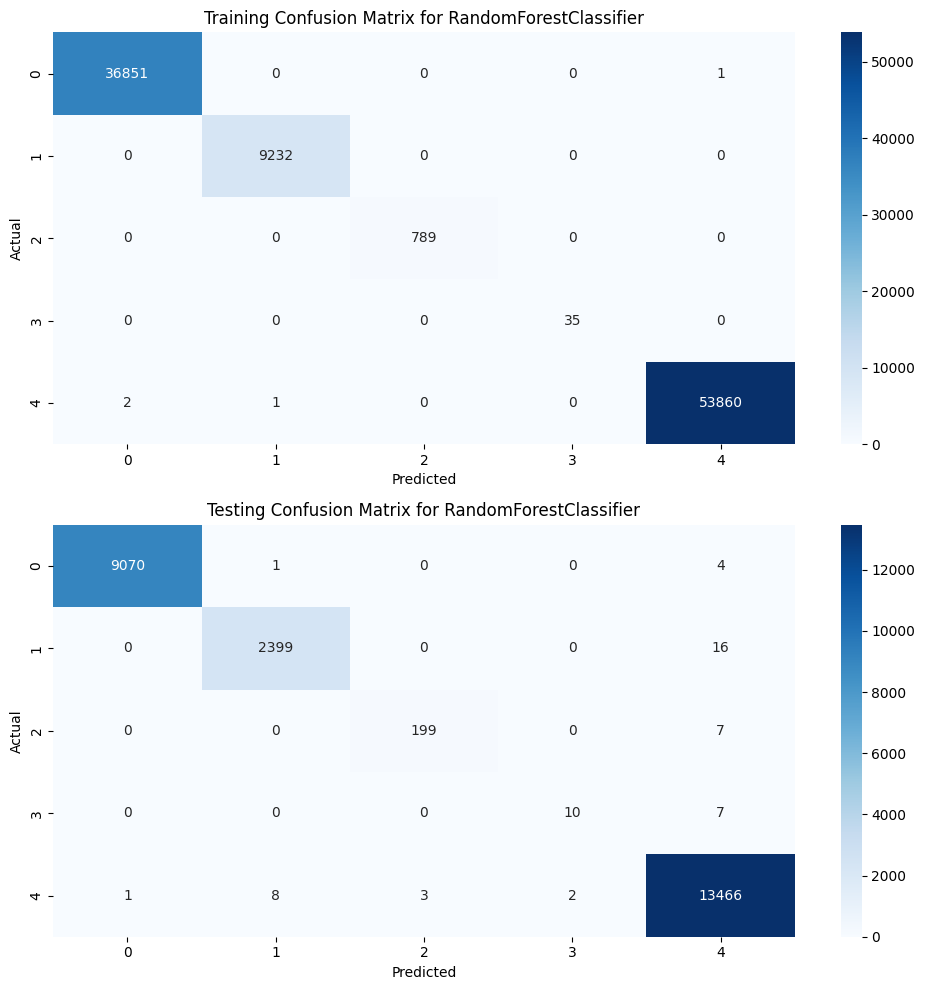

In [32]:
# Huấn luyện Random Forest
rf = RandomForestClassifier().fit(x_train_reduced, y_train_reduced)
rf_test_accuracy, rf_test_precision, rf_test_recall, rf_test_f1, rf_test_auc = evaluate_classification(rf, "RandomForestClassifier", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

In [33]:
joblib.dump(rf, '/content/drive/MyDrive/rf_model.pkl')

['/content/drive/MyDrive/rf_model.pkl']

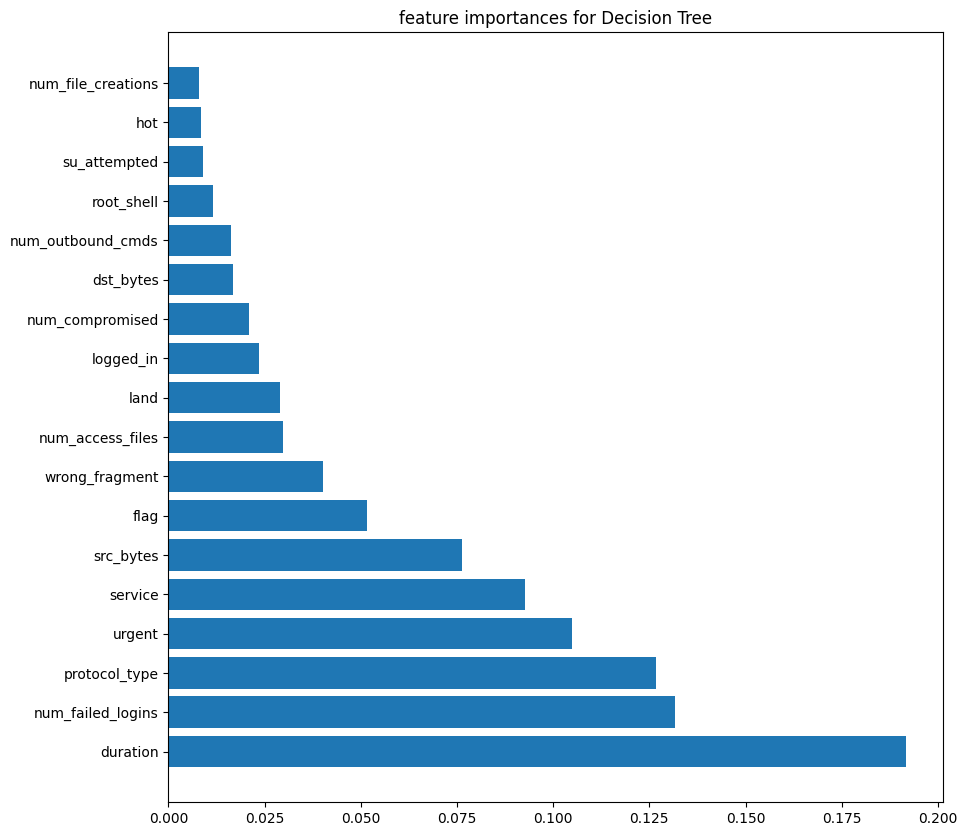

In [34]:
# Trực quan hóa độ quan trọng đặc trưng của mô hình Random Forest
f_importances(abs(rf.feature_importances_), features_names, top=18)

In [35]:
model_accuracy = pd.DataFrame({
    'Model': ['Linear Regression', 'Gaussian Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Random Forest'],
    'Test Accuracy': [lr_test_accuracy, gnb_test_accuracy, lin_svc_test_accuracy, tdt_test_accuracy, rf_test_accuracy],
    'Test Precision': [lr_test_precision, gnb_test_precision, lin_svc_test_precision, tdt_test_precision, rf_test_precision],
    'Test Recall': [lr_test_recall, gnb_test_recall, lin_svc_test_recall, tdt_test_recall, rf_test_recall],
    'Test F1-Score': [lr_test_f1, gnb_test_f1, lin_svc_test_f1, tdt_test_f1, rf_test_f1],
    'Test AUC': [lr_test_auc, gnb_test_auc, lin_svc_test_auc, tdt_test_auc, rf_test_auc]
})
model_accuracy.sort_values(by='Test F1-Score', ascending=False)

,Model,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Test AUC
4,Random Forest,0.998055,0.962423,0.909208,0.931570,0.999456
3,Decision Tree,0.996189,0.916187,0.903340,0.909263,0.951053
2,Support Vector Machine,0.940023,0.664465,0.608751,0.628227,NaN
0,Linear Regression,0.872901,0.572511,0.575499,0.571827,0.939167
1,Gaussian Naive Bayes,0.413805,0.432505,0.506408,0.272079,0.920811


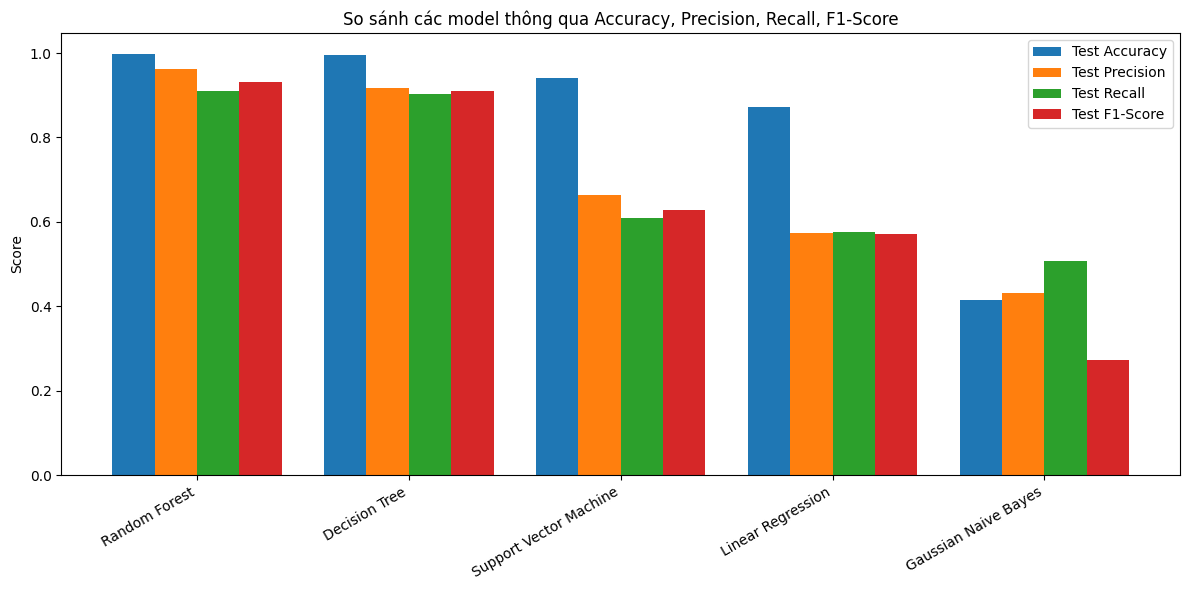

In [36]:
# Sắp xếp model_accuracy theo F1-Score giảm dần
sorted_df = model_accuracy.sort_values(by='Test F1-Score', ascending=False).reset_index(drop=True)
df_melted = sorted_df.melt(id_vars='Model',
                           value_vars=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score'],
                           var_name='Metric',
                           value_name='Score')
plt.figure(figsize=(12, 6))

# Lấy danh sách model và metric
models = sorted_df['Model'].tolist()
metrics = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score']
bar_width = 0.2
x = range(len(models))

for i, metric in enumerate(metrics):
    metric_scores = df_melted[df_melted['Metric'] == metric]['Score']
    plt.bar([pos + i * bar_width for pos in x], metric_scores, width=bar_width, label=metric)

plt.xticks([pos + 1.5 * bar_width for pos in x], models, rotation=30, ha='right')
plt.ylabel('Score')
plt.title('So sánh các model thông qua Accuracy, Precision, Recall, F1-Score')
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
rf_model_loaded = joblib.load('/content/drive/MyDrive/rf_model.pkl')
lr_model_loaded = joblib.load('/content/drive/MyDrive/logistic_regression_model.pkl')
svm_model_loaded = joblib.load('/content/drive/MyDrive/svm_model.pkl')
tdt_model_loaded = joblib.load('/content/drive/MyDrive/decision_tree_model.pkl')
gnb_model_loaded = joblib.load('/content/drive/MyDrive/naive_bayes_model.pkl')

### Demo

In [38]:
data_test = pd.read_csv(data_path + "KDDTest+.txt", header=None)

In [39]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
            'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
            'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
            'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

data_test.columns = columns

print(data_test.shape)
data_test.head()

(22544, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [40]:
# Nhóm thành 5 loại: normal, DoS, Probe, U2R, R2L
attack_category = {
    'normal': 'normal',

    # DoS (Denial of Service)
    'back': 'DoS', 'land': 'DoS', 'neptune': 'DoS', 'pod': 'DoS', 'smurf': 'DoS', 'teardrop': 'DoS',
    'apache2': 'DoS', 'udpstorm': 'DoS', 'processtable': 'DoS',

    # Probe (Surveillance/Scanning)
    'satan': 'Probe', 'ipsweep': 'Probe', 'nmap': 'Probe', 'portsweep': 'Probe', 'mscan': 'Probe', 'saint': 'Probe',

    # U2R (User to Root)
    'buffer_overflow': 'U2R', 'loadmodule': 'U2R', 'perl': 'U2R', 'rootkit': 'U2R', 'xterm': 'U2R', 'ps': 'U2R',
    'sqlattack': 'U2R',

    # R2L (Remote to Local)
    'guess_passwd': 'R2L', 'ftp_write': 'R2L', 'imap': 'R2L', 'phf': 'R2L', 'multihop': 'R2L', 'warezmaster': 'R2L',
    'warezclient': 'R2L', 'spy': 'R2L', 'xlock': 'R2L', 'xsnoop': 'R2L', 'sendmail': 'R2L', 'named': 'R2L',
    'snmpgetattack': 'R2L', 'snmpguess': 'R2L', 'httptunnel': 'R2L', 'worm': 'R2L'
}

data_test['attack_type'] = data_test['outcome'].map(attack_category)

In [41]:
data_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level,attack_type
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,DoS
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,DoS
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15,Probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11,Probe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15,DoS
22542,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21,normal


In [42]:
data_test.loc[data_test['outcome'] == "normal", "outcome"] = 'normal'
data_test.loc[data_test['outcome'] != "normal", "outcome"] = 'attack'

y_test_true_outcome = data_test['outcome'].copy()
y_test_true_attack_type = data_test['attack_type'].copy()

scaled_test = preprocess(data_test)
scaled_test = scaled_test.reindex(columns=scaled_train.columns, fill_value=0)

y_test_true_outcome = y_test_true_outcome.loc[scaled_test.index].values
y_test_true_attack_type = y_test_true_attack_type.loc[scaled_test.index].values

x_test_final = scaled_test.drop(['outcome', 'level'], axis=1).values
x_test_reduced_final = pca.transform(x_test_final)

In [43]:
y_pred = rf_model_loaded.predict(x_test_reduced_final)
result_df = scaled_test.copy()
result_df['attack_type'] = y_test_true_attack_type
result_df['original_outcome'] = y_test_true_outcome
result_df['Predicted_attack_type'] = y_pred
result_df['Predicted_outcome'] = result_df['Predicted_attack_type'].apply(lambda x: 'normal' if x=='normal' else 'attack')
result_df['Mismatch'] = (
    (result_df['original_outcome'] != result_df['Predicted_outcome']) |
    (result_df['attack_type'] != result_df['Predicted_attack_type'])
)

In [44]:
result_df.to_csv('KDDTest_Predicted.csv', index=False)

In [45]:
# result_df[['Original_outcome', 'Original_attack_type', 'Predicted_outcome', 'Predicted_attack_type']].to_csv('KDDTest_Predicted.csv', index=False)